In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.patches as mpatches

In [2]:
data, test, train, movies = pd.read_csv("data/data.csv"), pd.read_csv("data/test.csv"), pd.read_csv("data/train.csv"), pd.read_csv("data/movies.csv")


In [3]:
def get_uv(file_u, file_v):
    U, V = np.load(file_u), np.load(file_v)

    V_offsets = np.array([
        np.average(row) 
        for row in V
    ])

    V_mc = np.array([
        row - V_offsets[i]
        for i, row in enumerate(V)
    ])

    U_mc = np.array([
        row - V_offsets[i]
        for i, row in enumerate(U)
    ])

    V_A, V_E, V_B = np.linalg.svd(V_mc)
    V_A12 = V_A[:,:2]
    V_proj = V_A12.T @ V_mc
    U_proj = V_A12.T @ U_mc
    U_pn = np.array([
        row / np.var(row)
        for row in U_proj
    ])

    V_pn = np.array([
        row / np.var(row)
        for row in V_proj
    ])
    
    return U_pn, V_pn

In [25]:
def gen_rating_splot(method, V):
    ratings = data[["Movie ID", "Rating"]].groupby("Movie ID").mean()
    plt.figure(figsize=(10,8))
    cm = plt.cm.get_cmap('RdYlBu')
    r_arr = ratings["Rating"].array
    sc = plt.scatter(V[0], V[1], c=r_arr, vmin=min(r_arr), vmax=max(r_arr), s=35, cmap=cm, alpha=0.7)
    cbar = plt.colorbar(sc)
    cbar.set_label("Average Rating")
    plt.title("Principal Components of all Films ({})".format(method))
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()


In [55]:
def gen_star_sandler(method, V):
    star_trek_idx = np.array([222, 227, 228, 229, 230, 380, 449, 450]) - 1
    star_wars_idx = np.array([50, 172, 181]) - 1
    sandler_idx = np.array([41, 354, 577, 940, 763, 1209, 833]) - 1
    n_movies = V.shape[1]
    c = np.zeros(n_movies)
    for v, arr in enumerate([star_trek_idx, star_wars_idx, sandler_idx]):
        for idx in arr:
            c[idx] = v + 1

    color_map = ["pink", "blue", "red", "green"]
    label_map = ["Other", "Star Trek", "Star Wars", "Adam Sandler"]
    alpha_map = [0.15, 1, 1, 1]

    colors = [color_map[int(v)] for v in list(c)]
    alphas = [alpha_map[int(v)] for v in list(c)]
    labels = [label_map[int(v)] for v in list(c)]

    plt.figure(figsize=(8,8))
    plt.scatter(V[0], V[1], c=colors, s=35, alpha=alphas)
    plt.title("Highlighted Movie Franchises ({})".format(method))
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")

    plt.legend(handles=[
        mpatches.Patch(color=color, label=label, alpha=alpha)
        for color, label, alpha in zip(color_map, label_map, alpha_map)
    ])
    
#     for idx in list(star_trek_idx) + list(star_wars_idx)+ list(sandler_idx):
#         txt = str(movies.iloc[idx]["Movie Title"])
#         plt.text(V[0][idx], V[1][idx], txt)

    plt.show()

In [94]:

abbreviations = {"Star Trek: The Motion Picture (1979)":"ST 1",
"Star Trek: The Wrath of Khan (1982)":"ST 2",
"Star Trek III: The Search for Spock (1984)":"ST 3",
"Star Trek IV: The Voyage Home (1986)":"ST 4",
"Star Trek V: The Final Frontier (1989)":"ST 5",
"Star Trek VI: The Undiscovered Country (1991)":"ST 6",
"Star Trek: Generations (1994)":"ST 7",
"Star Trek: First Contact (1996)":"ST 8",
"Star Wars (1977)":"SW 4",
"Empire Strikes Back, The (1980)":"SW 5",
"Return of the Jedi (1983)":"SW 6",
"Billy Madison (1995)":"AS M",
"Wedding Singer, The (1998)":"AS W",
"Coneheads (1993)":"AS C",
"Airheads (1994)":"AS A",
"Happy Gilmore (1996)":"AS G",
"Mixed Nuts (1994)":"AS N",
"Bulletproof (1996)":"AS B"}


def gen_star_sandler_heat(method, V):
    star_trek_idx = np.array([222, 227, 228, 229, 230, 380, 449, 450]) - 1
    star_wars_idx = np.array([50, 172, 181]) - 1
    sandler_idx = np.array([41, 354, 577, 940, 763, 1209, 833]) - 1
    
    ratings = data[["Movie ID", "Rating"]].groupby("Movie ID").mean()
    plt.figure(figsize=(10,8))
    cm = plt.cm.get_cmap('RdYlBu')
    r_arr = ratings["Rating"].array
    
#     sc = plt.scatter(V[0], V[1], c=r_arr, 
#                      vmin=min(r_arr), vmax=max(r_arr),
#                      s=35, cmap=cm, alpha=0.7)
#     cbar = plt.colorbar(sc)
#     cbar.set_label("Average Rating")
#     plt.title("Principal Components of all Films ({})".format(method))
#     plt.xlabel("Component 1")
#     plt.ylabel("Component 2")
#     plt.show()
    
    
    n_movies = V.shape[1]
    c = np.zeros(n_movies)
    for v, arr in enumerate([star_trek_idx, star_wars_idx, sandler_idx]):
        for idx in arr:
            c[idx] = v + 1

    marker_map = [".", ">", "*", "X"]
    size_map = [30, 80, 80, 80]
    label_map = ["Other", "Star Trek", "Star Wars", "Adam Sandler"]
    alpha_map = [0.5, 1, 1, 1]

    markers = [marker_map[int(v)] for v in list(c)]
    sizes = [size_map[int(v)] for v in list(c)]
    alphas = [alpha_map[int(v)] for v in list(c)]
    labels = [label_map[int(v)] for v in list(c)]

    plt.figure(figsize=(10,10))
    plt.scatter(V[0], V[1], c=r_arr, vmin=min(r_arr), 
                vmax=max(r_arr), s=sizes, cmap=cm, alpha=alphas, 
                )
    cbar = plt.colorbar(sc)
    cbar.set_label("Average Rating")
    plt.title("Highlighted Movie Franchises ({})".format(method))
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")

#     plt.legend(handles=[
#         mpatches.Patch(shape=shape, label=label, alpha=alpha)
#         for shape, label, alpha in zip(shape_map, label_map, alpha_map)
#     ])
    
    for idx in list(star_trek_idx) + list(star_wars_idx) + list(sandler_idx):
        txt = str(movies.iloc[idx]["Movie Title"])
        plt.text(V[0][idx], V[1][idx], abbreviations[txt])

    plt.show()

/opt/anaconda3/envs/ciao-4.12/lib/python3.7/site-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().


<Figure size 720x576 with 0 Axes>

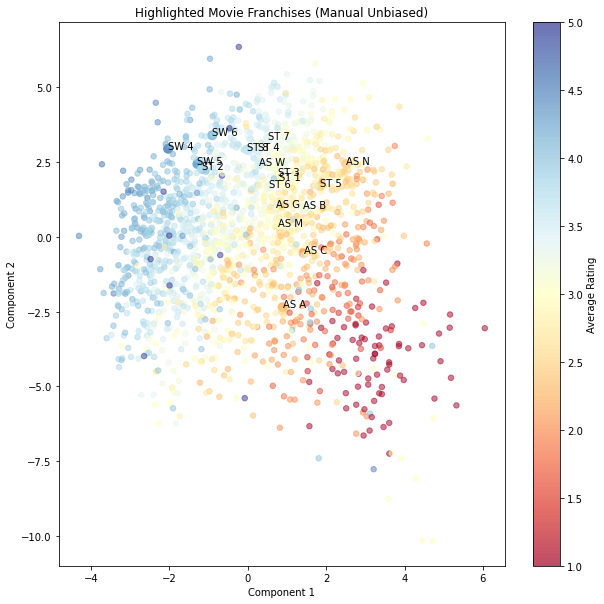

<Figure size 720x576 with 0 Axes>

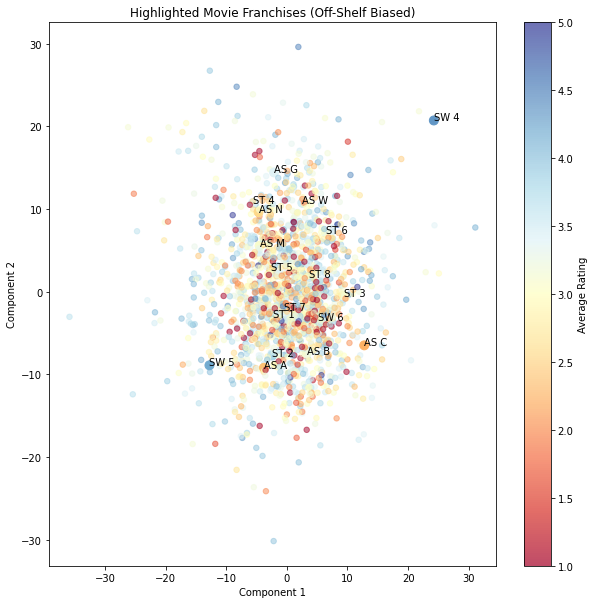

<Figure size 720x576 with 0 Axes>

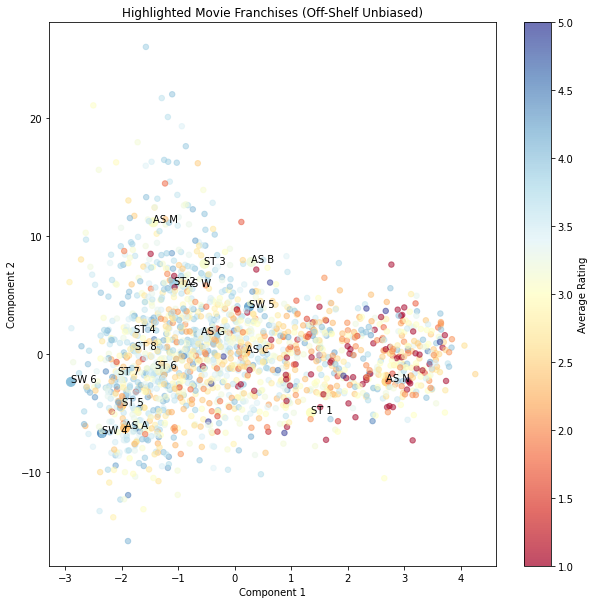

In [96]:
set5 = ('method1_U.npy', 'method1_V.npy')
biased = ("ots_bias_U.npy", "ots_bias_V.npy")
unbiased = ("ots_U.npy", "ots_V.npy")

params = [
    {
        "method":"Manual Unbiased",
        "files":set5
    },
    {
        "method":"Off-Shelf Biased",
        "files":biased
    },
    {
        "method":"Off-Shelf Unbiased",
        "files":unbiased
    }
]


for param in params:
    method, files = param["method"], param["files"]
    U, V = get_uv(files[0], files[1])
    gen_star_sandler_heat(method, V)
    
    

In [97]:
star_trek_idx = np.array([222, 227, 228, 229, 230, 380, 449, 450]) - 1
star_wars_idx = np.array([50, 172, 181]) - 1
sandler_idx = np.array([41, 354, 577, 940, 763, 1209, 833]) - 1

for idxgroup in [star_trek_idx, star_wars_idx, sandler_idx]:
    print(", ".join(list(movies.iloc[sorted(idxgroup)]["Movie Title"])), "\n")

Star Trek: First Contact (1996), Star Trek VI: The Undiscovered Country (1991), Star Trek: The Wrath of Khan (1982), Star Trek III: The Search for Spock (1984), Star Trek IV: The Voyage Home (1986), Star Trek: Generations (1994), Star Trek: The Motion Picture (1979), Star Trek V: The Final Frontier (1989) 

Star Wars (1977), Empire Strikes Back, The (1980), Return of the Jedi (1983) 

Billy Madison (1995), Wedding Singer, The (1998), Coneheads (1993), Happy Gilmore (1996), Bulletproof (1996), Airheads (1994), Mixed Nuts (1994) 

